In [48]:
"""This is a note book to train random forest prediction datasets for mushrooms dataset"""

'This is a note book to train random forest prediction datasets for mushrooms dataset'

In [49]:
import pandas as pd

In [50]:
data = pd.read_csv('../datasets/mushrooms.csv')

In [51]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [52]:
mappings = {
    "class":{
        "p":"poisonous",
        "e":"edible",
    },
    "cap-shape": {
        "b": "bell", "c": "conical", "x": "convex",
        "f": "flat", "k": "knobbed", "s": "sunken"
    },
    "cap-surface": {
        "f": "fibrous", "g": "grooves", "y": "scaly", "s": "smooth"
    },
    "cap-color": {
        "n": "brown", "b": "buff", "c": "cinnamon", "g": "gray", "r": "green",
        "p": "pink", "u": "purple", "e": "red", "w": "white", "y": "yellow"
    },
    "bruises": {"t": "bruises", "f": "no"},
    "odor": {
        "a": "almond", "l": "anise", "c": "creosote", "y": "fishy", "f": "foul",
        "m": "musty", "n": "none", "p": "pungent", "s": "spicy"
    },
    "gill-attachment": {"a": "attached", "d": "descending", "f": "free", "n": "notched"},
    "gill-spacing": {"c": "close", "w": "crowded", "d": "distant"},
    "gill-size": {"b": "broad", "n": "narrow"},
    "gill-color": {
        "k": "black", "n": "brown", "b": "buff", "h": "chocolate", "g": "gray",
        "r": "green", "o": "orange", "p": "pink", "u": "purple", "e": "red",
        "w": "white", "y": "yellow"
    },
    "stalk-shape": {"e": "enlarging", "t": "tapering"},
    "stalk-root": {
        "b": "bulbous", "c": "club", "u": "cup", "e": "equal",
        "z": "rhizomorphs", "r": "rooted", "?": "missing"
    },
    "stalk-surface-above-ring": {"f": "fibrous", "y": "scaly", "k": "silky", "s": "smooth"},
    "stalk-surface-below-ring": {"f": "fibrous", "y": "scaly", "k": "silky", "s": "smooth"},
    "stalk-color-above-ring": {
        "n": "brown", "b": "buff", "c": "cinnamon", "g": "gray", "o": "orange",
        "p": "pink", "e": "red", "w": "white", "y": "yellow"
    },
    "stalk-color-below-ring": {
        "n": "brown", "b": "buff", "c": "cinnamon", "g": "gray", "o": "orange",
        "p": "pink", "e": "red", "w": "white", "y": "yellow"
    },
    "veil-type": {"p": "partial", "u": "universal"},
    "veil-color": {"n": "brown", "o": "orange", "w": "white", "y": "yellow"},
    "ring-number": {"n": "none", "o": "one", "t": "two"},
    "ring-type": {
        "c": "cobwebby", "e": "evanescent", "f": "flaring", "l": "large",
        "n": "none", "p": "pendant", "s": "sheathing", "z": "zone"
    },
    "spore-print-color": {
        "k": "black", "n": "brown", "b": "buff", "h": "chocolate",
        "r": "green", "o": "orange", "u": "purple", "w": "white", "y": "yellow"
    },
    "population": {
        "a": "abundant", "c": "clustered", "n": "numerous",
        "s": "scattered", "v": "several", "y": "solitary"
    },
    "habitat": {
        "g": "grasses", "l": "leaves", "m": "meadows", "p": "paths",
        "u": "urban", "w": "waste", "d": "woods"
    }
}

In [53]:
data = data.replace(mappings)

In [54]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


In [55]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [56]:
data.columns.isnull().sum()

np.int64(0)

In [57]:
X = data.drop(columns=["class"])
y = data[["class"]]

print(x.shape,y.shape)

(8124, 22) (8124, 1)


In [58]:
from sklearn.preprocessing import LabelEncoder

# Encode features
X_encoded = X.apply(LabelEncoder().fit_transform)

# Encode target
y_encoded = LabelEncoder().fit_transform(y)


X_encoded.head()

e:\AgroML_Hub\models\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,2,3,0,0,7,1,0,1,0,0,...,3,7,7,0,2,1,4,0,3,4
1,2,3,9,0,0,1,0,0,0,0,...,3,7,7,0,2,1,4,1,2,0
2,0,3,8,0,1,1,0,0,1,0,...,3,7,7,0,2,1,4,1,2,2
3,2,2,8,0,7,1,0,1,1,0,...,3,7,7,0,2,1,4,0,3,4
4,2,3,3,1,6,1,1,0,0,1,...,3,7,7,0,2,1,0,1,0,0


In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

In [60]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    max_depth=None,
    random_state= 42
)

rf.fit(X_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [61]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



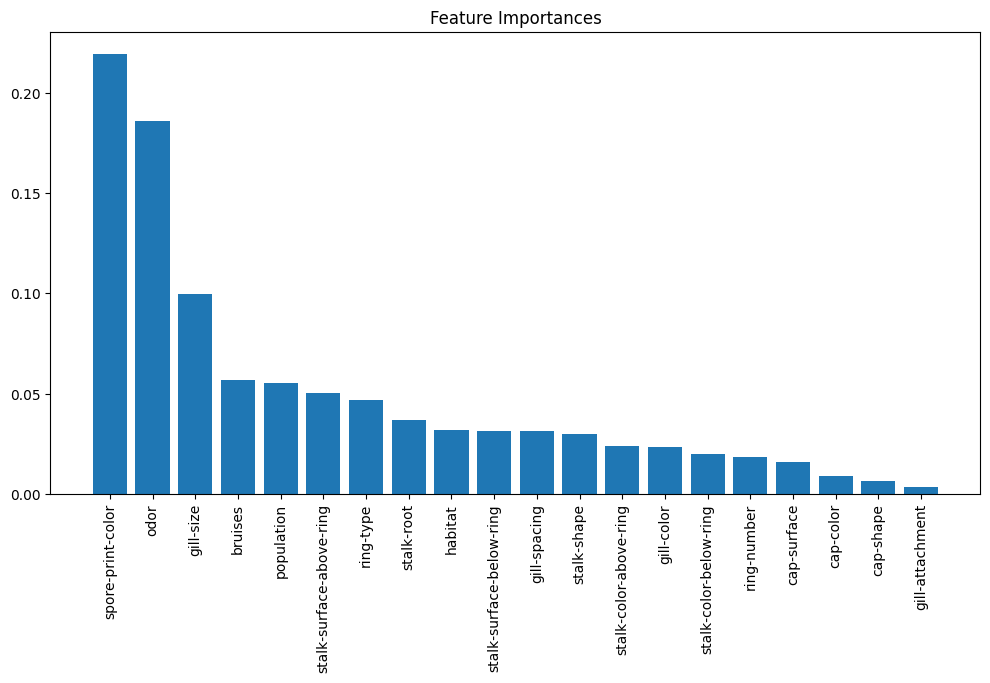

In [62]:
import matplotlib.pyplot as plt
import numpy as np

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Take top k features (max = number of features)
k = min(20, len(importances))

plt.figure(figsize=(12,6))
plt.title("Feature Importances")
plt.bar(range(k), importances[indices[:k]], align="center")
plt.xticks(range(k), X.columns[indices[:k]], rotation=90)
plt.show()


In [63]:
# Take first 5 rows from X_test
sample = X_test.head()

# Predict on them
predictions = rf.predict(sample)

print("Predictions:", predictions.tolist())
print("Actual:", y_test[:5].tolist())   # use slicing for numpy arrays

Predictions: [1, 1, 0, 1, 1]
Actual: [1, 1, 0, 1, 1]


In [64]:
import joblib

# Save trained model
joblib.dump(rf, "random_mushrooms_model.pkl")
print("✅ Model saved as random_mushrooms_model.pkl")

✅ Model saved as random_mushrooms_model.pkl
